In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y

array([ 5, 20, 14, 32, 22, 38])

In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [8]:
print(f"intercept: {model.intercept_}")

intercept: 5.633333333333329


In [9]:
print(f"slope: {model.coef_}")

slope: [0.54]


In [10]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

intercept: [5.63333333]


In [11]:
print(f"slope: {new_model.coef_}")

slope: [[0.54]]


In [12]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [13]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [14]:
x_new = np.arange(5).reshape((-1, 1))
x_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [15]:
y_new = model.predict(x_new)
y_new

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [19]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
transformer.fit(x)

,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [21]:
x_ = transformer.transform(x)

In [22]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [23]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [24]:
model = LinearRegression().fit(x_, y)

In [25]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8908516262498564


In [26]:
print(f"intercept: {model.intercept_}")

intercept: 21.37232142857144


In [27]:
print(f"coefficients: {model.coef_}")

coefficients: [-1.32357143  0.02839286]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [29]:
df_sal = pd.read_csv('Salary Data.csv')
df_sal.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [30]:
df_sal.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


C:\Users\priya\AppData\Local\Temp\ipykernel_7388\3676038920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


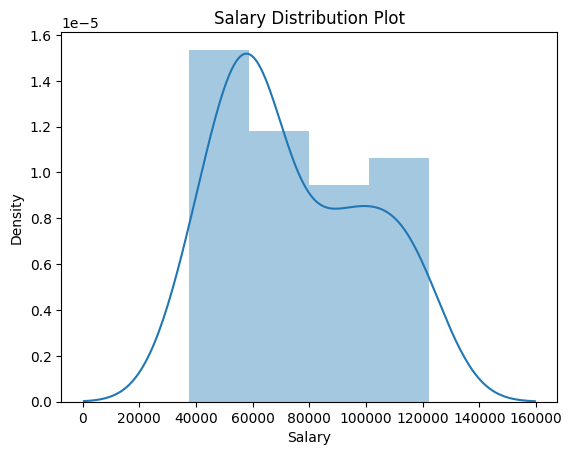

In [32]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

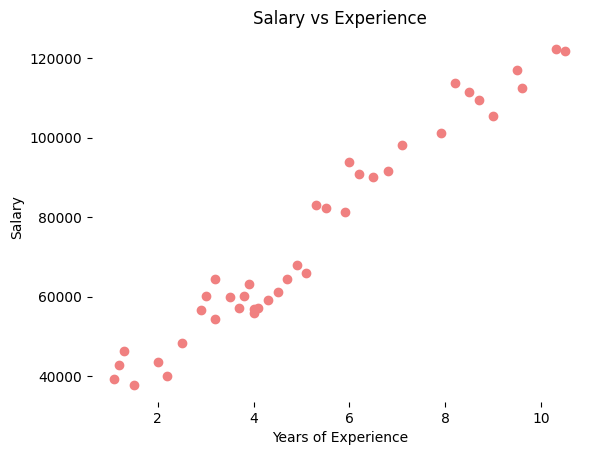

In [34]:
# Relationship between Salary and Experience
plt.scatter(df_sal['Experience Years'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [35]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [36]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

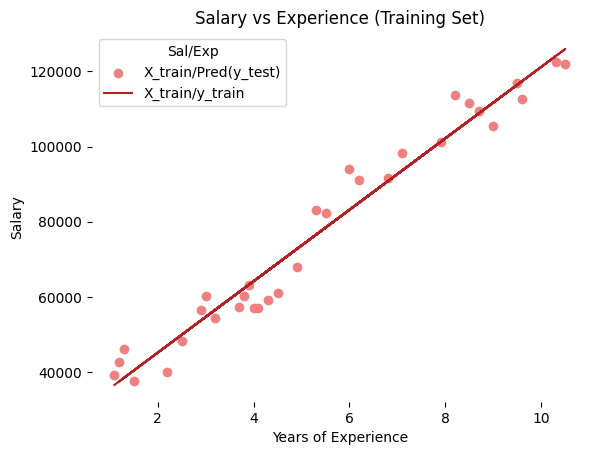

In [39]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

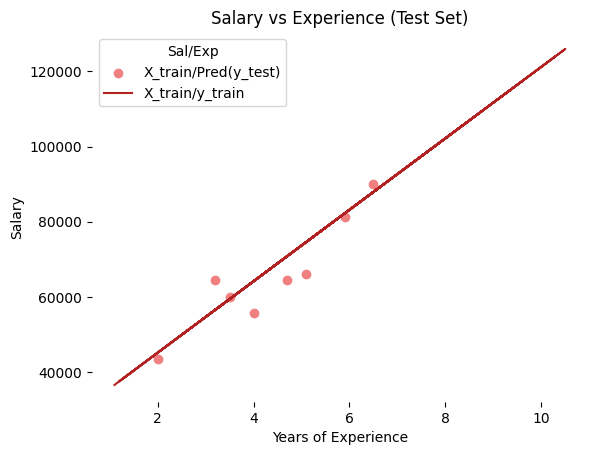

In [40]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [41]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9509.86964874]]
Intercept: [26124.97862925]


In [42]:
r_sq=regressor.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.9620439120667255
